<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
from tqdm import tqdm_notebook

In [3]:
for i in tqdm_notebook (xrange(10**5)):
    pass

In [4]:
# Your Code Here
wine = pd.read_csv ("winequality-red.csv", sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.loc[:, 'quality'] = (wine.loc[:, 'quality'] > 5).astype(int)

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
from sklearn import model_selection

In [8]:
train, test = model_selection.train_test_split (wine, test_size = 0.2)

In [9]:
train.shape, test.shape

((1279, 12), (320, 12))

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [10]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

# from sklearn.metrics import roc_auc_score, make_scorer

In [11]:
# Your Code Here
# roc_auc = make_scorer (roc_auc_score)
scores = []
min_val = float ('inf')
for d in tqdm_notebook(xrange (1, 20)):
    dt = DecisionTreeClassifier (max_depth=d, random_state=10)
    xex = np.linalg.norm (cross_val_score (dt, X=wine.drop ('quality', axis=1), y=wine['quality'], cv=3, scoring='roc_auc'))
    scores.append (xex)
    if (min_val > xex):
        min_val = xex
        min_d = d
print min_val, d


1.0979316227 19


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


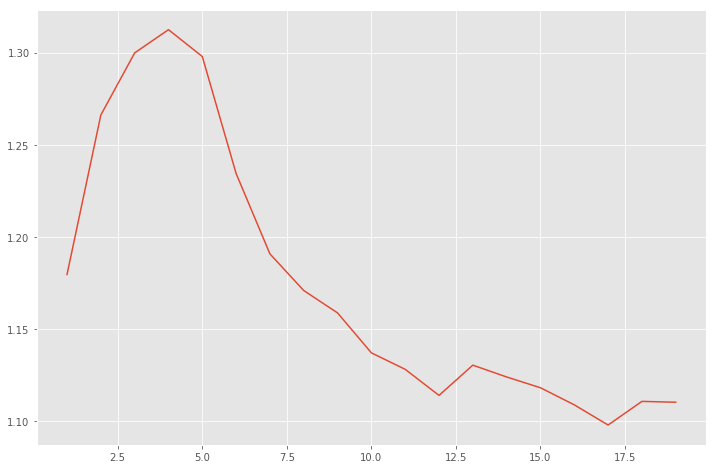

In [12]:
plt.plot (range(1,20), scores)

In [13]:
dt = DecisionTreeClassifier (random_state=123)
train_scores, test_scores = validation_curve (dt, wine.drop('quality', axis=1), wine['quality'], 'max_depth', range(1,20), scoring='roc_auc')

In [14]:
train_mean = train_scores.mean (axis=1)
test_mean = test_scores.mean (axis=1)
train_std = train_scores.std (axis=1)
test_std = test_scores.std (axis=1)

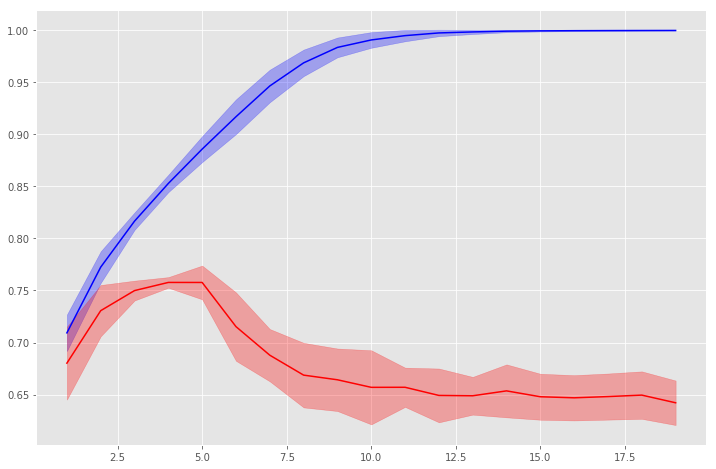

In [15]:
d = range (1, 20)
plt.plot (d, train_mean, color='b')
plt.plot (d, test_mean, color='r')

plt.fill_between (d, train_mean - train_std, train_mean + train_std, color='b', alpha=0.3)
plt.fill_between (d, test_mean - test_std, test_mean + test_std, color='r', alpha=0.3)

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [16]:
# Your Code Here
# [x for (y,x) in sorted(zip(Y,X))]
dtcl = DecisionTreeClassifier (max_depth=4, random_state=123)
dtcl.fit (train.drop('quality', axis=1), train['quality'].values)

col_sorted = [x for (y, x) in sorted (zip (dtcl.feature_importances_, wine.columns[wine.columns != 'quality']), reverse=True)]
col_sorted

['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'density',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'fixed acidity',
 'citric acid',
 'chlorides']

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

precision:  0.673913043478
recall:  0.738095238095
f1 score:  0.704545454545


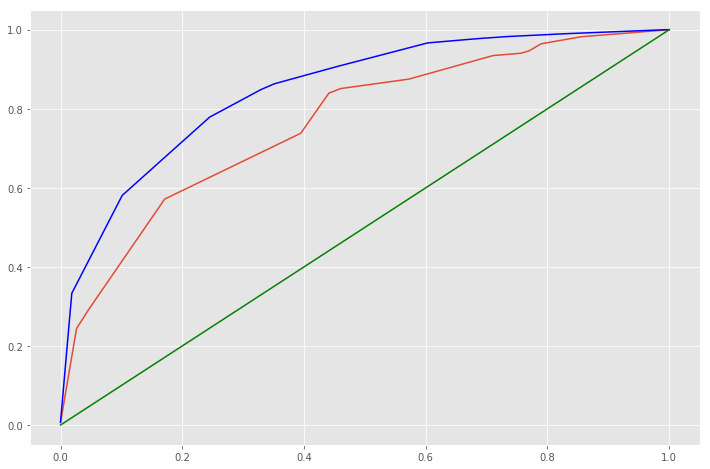

In [17]:
# Your Code Here
from sklearn.metrics import roc_curve
from sklearn import metrics
test_res = dtcl.predict (test.drop ('quality', axis=1))
test_res_proba = dtcl.predict_proba (test.drop ('quality', axis=1))
train_res = dtcl.predict (train.drop ('quality', axis=1))
train_res_proba = dtcl.predict_proba (train.drop ('quality', axis=1))

test_proba = [y for (x,y) in test_res_proba]
train_proba = [y for (x,y) in train_res_proba]
fpr_test, tpr_test , thresholds_test= roc_curve(test['quality'], test_proba)
fpr_train, tpr_train , thresholds_train= roc_curve(train['quality'], train_proba)

plt.plot (fpr_test, tpr_test)
plt.plot (fpr_train, tpr_train,color='b')
plt.plot ([0,1], [0,1], color='g')

R = metrics.recall_score (test['quality'].values, test_res)
P = metrics.precision_score (test['quality'].values, test_res)
print "precision: ",P
print "recall: ",R
F = metrics.f1_score (test['quality'].values,test_res)
print "f1 score: ",F

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Your Code Here
bc_100 = BaggingClassifier (dtcl, n_estimators=50)
bc_100.fit (train.drop('quality', axis=1), train.quality)
bc_100_proba = bc_100.predict_proba (test.drop ('quality', axis=1))
bc_100_proba_res = [y for (x,y) in bc_100_proba]
fpr_test_100, tpr_test_100 , thresholds_test = roc_curve(test['quality'].values, bc_100_proba_res)

In [20]:
bc = BaggingClassifier (dtcl)
bc.fit (train.drop('quality', axis=1), train.quality)
bc_proba = bc.predict_proba (test.drop ('quality', axis=1))
bc_proba_res = [y for (x,y) in bc_proba]
fpr_test, tpr_test , thresholds_test = roc_curve(test['quality'].values, bc_proba_res)

In [21]:
list_bc = []
for trees in range (10, 101, 10):
    bc_100 = BaggingClassifier (dtcl, n_estimators=trees)
    bc_100.fit (train.drop('quality', axis=1), train.quality)
    bc_100_res = bc_100.predict (test.drop ('quality', axis=1))
    list_bc.append (metrics.f1_score (test['quality'].values,bc_100_res))

list_rf = []
for trees in range (10, 101, 10):
    rf_100 = RandomForestClassifier (n_estimators=trees)
    rf_100.fit (train.drop('quality', axis=1), train.quality)
    rf_100_res = rf_100.predict (test.drop ('quality', axis=1))
    list_rf.append (metrics.f1_score (test['quality'].values,rf_100_res))

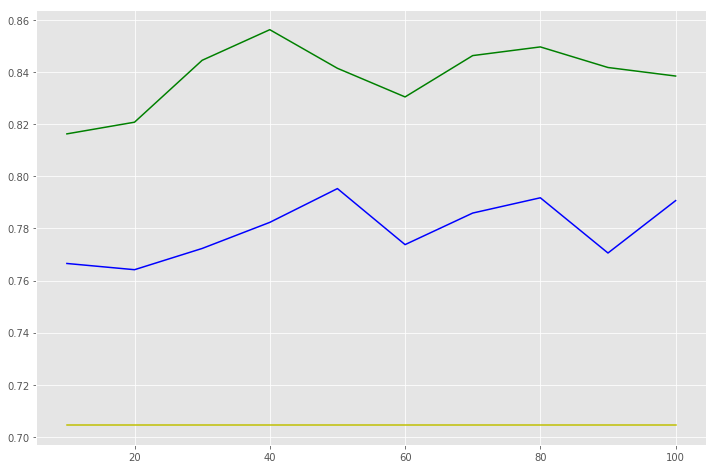

In [22]:
plt.plot (range(10,101, 10), list_bc, color='b')
plt.plot (range(10,101, 10), list_rf, color='g')
plt.plot (range(10,101, 10), [F]*10, color = 'y')

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [23]:
# Your Code Here
from scipy.stats import norm
res_norms = norm.rvs(size=100)
res_norms = res_norms - min(res_norms)
res_norms = res_norms / (2 * max(res_norms))

In [24]:
from sklearn.model_selection import  RandomizedSearchCV
rf_rs = RandomForestClassifier()
parameters = {'n_estimators':range (1, 120), 'min_samples_leaf':range (1, 20)}
rs = RandomizedSearchCV (rf_rs, parameters)
rs.fit (train.drop ('quality',axis=1), train.quality)
res = rs.best_params_
print res

{'n_estimators': 65, 'min_samples_leaf': 4}


In [25]:
super_forest = RandomForestClassifier (n_estimators=73, min_samples_leaf=1)#, min_weight_fraction_leaf=0.16359904774449249, min_samples_leaf=9)
print "with fited params: ", np.linalg.norm(cross_val_score (super_forest, train.drop('quality', axis=1), train.quality,scoring='roc_auc'))
forest =  RandomForestClassifier()
print "default forest: ", np.linalg.norm(cross_val_score (forest, train.drop('quality', axis=1), train.quality, scoring='roc_auc'))

with fited params:  1.49542431586
default forest:  1.44844072864


In [26]:
super_forest.fit (train.drop('quality', axis=1), train.quality)
super_res_forest = super_forest.predict (test.drop('quality',axis =1))
print "f1 score for fitted params: ", metrics.f1_score (test.quality, super_res_forest)
forest.fit (train.drop('quality', axis=1), train.quality)
res_forest = forest.predict (test.drop('quality',axis =1))
print "f1 score for default params: ", metrics.f1_score (test.quality, res_forest)

ValueError: labels ['quality_cat'] not contained in axis